# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 안경

In [11]:
# 안경만 남기기
ap_glasses = df_ap_quarter[df_ap_quarter.업종명 == '안경'].reset_index().drop('index', axis=1)
ap_glasses

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,소매,의류/잡화,안경,압구정동,2639009592,23,0,0
1,2017-2,소매,의류/잡화,안경,압구정동,2973513016,23,1,1
2,2017-3,소매,의류/잡화,안경,압구정동,2407186285,22,0,1
3,2017-4,소매,의류/잡화,안경,압구정동,2501277139,21,0,1
4,2018-1,소매,의류/잡화,안경,압구정동,2307336355,21,1,1
5,2018-2,소매,의류/잡화,안경,압구정동,2497901558,22,2,1
6,2018-3,소매,의류/잡화,안경,압구정동,2221422464,22,0,0
7,2018-4,소매,의류/잡화,안경,압구정동,1846488944,23,2,1
8,2019-1,소매,의류/잡화,안경,압구정동,2891061395,24,1,0
9,2019-2,소매,의류/잡화,안경,압구정동,2576370750,25,1,0


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [12]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_glasses['성장성'] = ap_glasses['분기당_매출_금액'] / ap_glasses['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_glasses['성장성'][0] = 1

ap_glasses

<ipython-input-12-867b31d4363c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_glasses['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,소매,의류/잡화,안경,압구정동,2639009592,23,0,0,1.000000
1,2017-2,소매,의류/잡화,안경,압구정동,2973513016,23,1,1,1.126753
2,2017-3,소매,의류/잡화,안경,압구정동,2407186285,22,0,1,0.809543
3,2017-4,소매,의류/잡화,안경,압구정동,2501277139,21,0,1,1.039087
4,2018-1,소매,의류/잡화,안경,압구정동,2307336355,21,1,1,0.922463
5,2018-2,소매,의류/잡화,안경,압구정동,2497901558,22,2,1,1.082591
6,2018-3,소매,의류/잡화,안경,압구정동,2221422464,22,0,0,0.889315
7,2018-4,소매,의류/잡화,안경,압구정동,1846488944,23,2,1,0.831219
8,2019-1,소매,의류/잡화,안경,압구정동,2891061395,24,1,0,1.565707
9,2019-2,소매,의류/잡화,안경,압구정동,2576370750,25,1,0,0.891150


In [13]:
# 개업률, 폐업률, 순점포증감률 추가

ap_glasses['개업률'] = (ap_glasses['개업점포수'] / ap_glasses['총 점포수']) * 100
ap_glasses['폐업률'] = (ap_glasses['폐업점포수'] / ap_glasses['총 점포수']) * 100
ap_glasses['순점포증감률'] = ((ap_glasses['개업점포수'] - ap_glasses['폐업점포수']) / ap_glasses['총 점포수']) * 100

ap_glasses

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,소매,의류/잡화,안경,압구정동,2639009592,23,0,0,1.000000,0.000000,0.000000,0.000000
1,2017-2,소매,의류/잡화,안경,압구정동,2973513016,23,1,1,1.126753,4.347826,4.347826,0.000000
2,2017-3,소매,의류/잡화,안경,압구정동,2407186285,22,0,1,0.809543,0.000000,4.545455,-4.545455
3,2017-4,소매,의류/잡화,안경,압구정동,2501277139,21,0,1,1.039087,0.000000,4.761905,-4.761905
4,2018-1,소매,의류/잡화,안경,압구정동,2307336355,21,1,1,0.922463,4.761905,4.761905,0.000000
5,2018-2,소매,의류/잡화,안경,압구정동,2497901558,22,2,1,1.082591,9.090909,4.545455,4.545455
6,2018-3,소매,의류/잡화,안경,압구정동,2221422464,22,0,0,0.889315,0.000000,0.000000,0.000000
7,2018-4,소매,의류/잡화,안경,압구정동,1846488944,23,2,1,0.831219,8.695652,4.347826,4.347826
8,2019-1,소매,의류/잡화,안경,압구정동,2891061395,24,1,0,1.565707,4.166667,0.000000,4.166667
9,2019-2,소매,의류/잡화,안경,압구정동,2576370750,25,1,0,0.891150,4.000000,0.000000,4.000000


In [14]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 안경만 남기기
gangnam_glasses = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '안경'].reset_index()

################################################################################################################################################################################################

ap_glasses['시장성'] = (ap_glasses['분기당_매출_금액'] / ap_glasses['총 점포수']) - (gangnam_glasses['분기당_매출_금액'] / gangnam_glasses['총 점포수'])

ap_glasses = ap_glasses[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_glasses

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,안경,2639009592,1.000000,0.000000,-1.413315e+07
1,2017-2,안경,2973513016,1.126753,0.000000,-2.008426e+07
2,2017-3,안경,2407186285,0.809543,-4.545455,-1.010021e+07
3,2017-4,안경,2501277139,1.039087,-4.761905,9.875845e+06
4,2018-1,안경,2307336355,0.922463,0.000000,-4.344723e+06
5,2018-2,안경,2497901558,1.082591,4.545455,-7.657134e+06
6,2018-3,안경,2221422464,0.889315,0.000000,-9.250249e+06
7,2018-4,안경,1846488944,0.831219,4.347826,-7.778654e+06
8,2019-1,안경,2891061395,1.565707,4.166667,2.305281e+07
9,2019-2,안경,2576370750,0.891150,4.000000,9.024241e+06


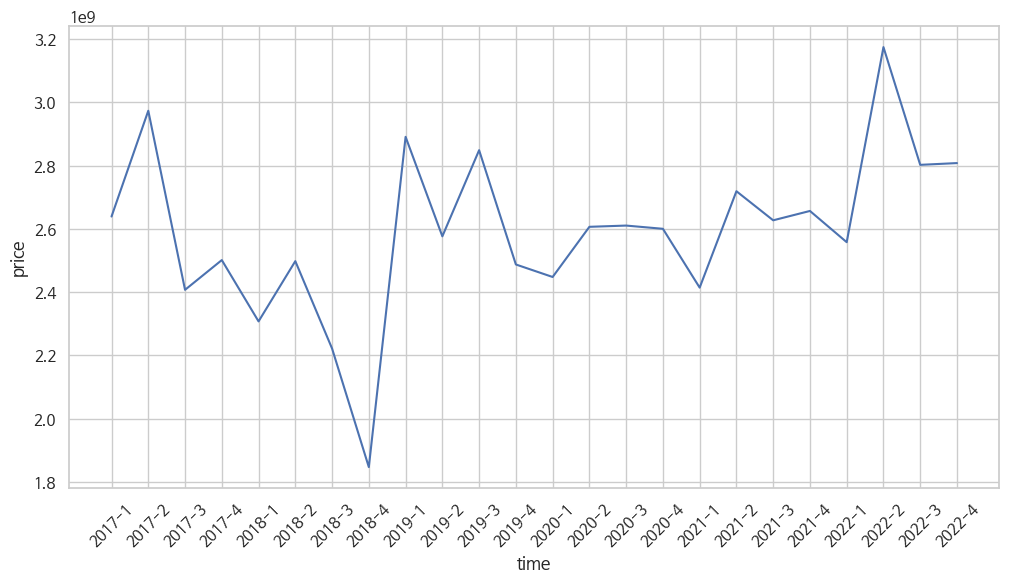

In [15]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_glasses['분기'], y=ap_glasses['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [16]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_glasses[['성장성', '시장성', '순점포증감률']]
y = ap_glasses.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.413315e+07  0.000000
1   1.126753 -2.008426e+07  0.000000
2   0.809543 -1.010021e+07 -4.545455
3   1.039087  9.875845e+06 -4.761905
4   0.922463 -4.344723e+06  0.000000
5   1.082591 -7.657134e+06  4.545455
6   0.889315 -9.250249e+06  0.000000
7   0.831219 -7.778654e+06  4.347826
8   1.565707  2.305281e+07  4.166667
9   0.891150  9.024241e+06  4.000000
10  1.105738  2.422192e+07 -4.000000
11  0.873119  1.361433e+07  0.000000
12  0.984095  2.220935e+07  0.000000
13  1.064829  2.579037e+07 -4.761905
14  1.001510  4.239485e+07  0.000000
15  0.996088  4.798426e+07  0.000000
16  0.928437  3.208893e+07  0.000000
17  1.126303  3.897579e+07  0.000000
18  0.966173  3.773355e+07  0.000000
19  1.011257  3.918644e+07  9.523810
20  0.962823  3.280120e+07  0.000000
21  1.241209  5.457317e+07  0.000000
22  0.882710  4.209091e+07  0.000000
23  1.001989  3.763321e+07  4.545455
---------------------------------------------------------------------------

In [17]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [18]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [19]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [20]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.09676022 0.83280617 0.33333333]
 [0.25450289 0.77309746 0.65151515]]


In [21]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [22]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [23]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2744
Epoch 1: val_loss improved from inf to 0.35096, saving model to stock_model.h5
1/1 [==============================] - 9s 9s/step - loss: 0.2744 - val_loss: 0.3510
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2735
Epoch 2: val_loss improved from 0.35096 to 0.34971, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2735 - val_loss: 0.3497
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2726
Epoch 3: val_loss improved from 0.34971 to 0.34846, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.2726 - val_loss: 0.3485
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2717
Epoch 4: val_loss improved from 0.34846 to 0.34722, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.2717 - val_loss: 0.3472
Epoch 5/300
1/1 [=================

In [24]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 655ms/step
[[0.54369277]
 [0.6367082 ]
 [0.48884934]
 [0.53267777]]


In [25]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.535527,0.543693
2022-2,1.000000,0.636708
2022-3,0.719666,0.488849
2022-4,0.723863,0.532678


In [26]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_glasses의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.535527,0.543693,2557847897,2.568695e+09,-10846631.0
2022-2,1.000000,0.636708,3174822798,2.692250e+09,482572942.0
2022-3,0.719666,0.488849,2802446311,2.495844e+09,306602215.0
2022-4,0.723863,0.532678,2808020188,2.554063e+09,253957340.0


In [27]:
df_test = df_test.reset_index()

### 결과

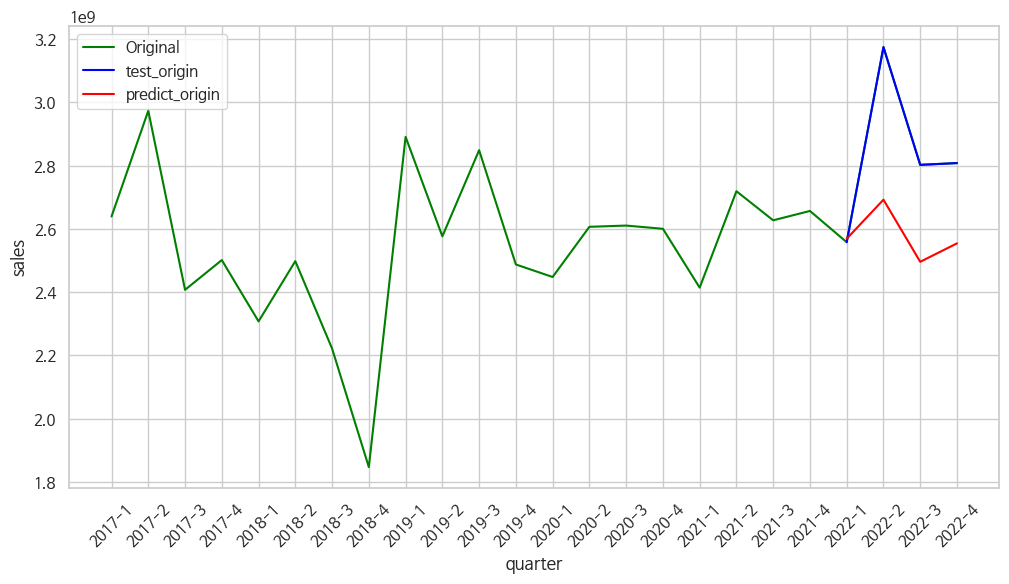

In [28]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [29]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.580715e+08
std      2.041976e+08
min     -1.084663e+07
25%      1.877563e+08
50%      2.802798e+08
75%      3.505949e+08
max      4.825729e+08
dtype: float64

In [30]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.486443]]
--------------------------------------------------------------------------------
예측된 매출  : 2492647680.0 


## 23년 1분기 성장성 예측

In [31]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_glasses[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_glasses.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성    순점포증감률
0   2639009592 -1.413315e+07  0.000000
1   2973513016 -2.008426e+07  0.000000
2   2407186285 -1.010021e+07 -4.545455
3   2501277139  9.875845e+06 -4.761905
4   2307336355 -4.344723e+06  0.000000
5   2497901558 -7.657134e+06  4.545455
6   2221422464 -9.250249e+06  0.000000
7   1846488944 -7.778654e+06  4.347826
8   2891061395  2.305281e+07  4.166667
9   2576370750  9.024241e+06  4.000000
10  2848790161  2.422192e+07 -4.000000
11  2487332547  1.361433e+07  0.000000
12  2447772617  2.220935e+07  0.000000
13  2606459555  2.579037e+07 -4.761905
14  2610395965  4.239485e+07  0.000000
15  2600185061  4.798426e+07  0.000000
16  2414108555  3.208893e+07  0.000000
17  2719017695  3.897579e+07  0.000000
18  2627040878  3.773355e+07  0.000000
19  2656613352  3.918644e+07  9.523810
20  2557847897  3.280120e+07  0.000000
21  3174822798  5.457317e+07  0.000000
22  2802446311  4.209091e+07  0.000000
23  2808020188  3.763321e+07  4.545455
-------------------------

In [32]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [33]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [34]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.71966649 0.83280617 0.33333333]
 [0.72386264 0.77309746 0.65151515]]


In [35]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [36]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1517
Epoch 1: val_loss improved from inf to 0.09457, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1517 - val_loss: 0.0946
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1511
Epoch 2: val_loss improved from 0.09457 to 0.09385, saving model to stock_model.h5
1/1 [==============================] - 0s 109ms/step - loss: 0.1511 - val_loss: 0.0939
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1506
Epoch 3: val_loss improved from 0.09385 to 0.09314, saving model to stock_model.h5
1/1 [==============================] - 0s 109ms/step - loss: 0.1506 - val_loss: 0.0931
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1500
Epoch 4: val_loss improved from 0.09314 to 0.09243, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.1500 - val_loss: 0.0924
Epoch 5/300
1/1 [===============

In [38]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 593ms/step
[[0.30317932]
 [0.32723463]
 [0.26420382]
 [0.2905912 ]]


In [39]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.202707,0.303179
2022-2,0.570862,0.327235
2022-3,0.096760,0.264204
2022-4,0.254503,0.290591


In [40]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 3].values       # 성장성이 ap_glasses의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.202707,0.303179,0.962823,1.038796,-0.075974
2022-2,0.570862,0.327235,1.241209,1.056986,0.184223
2022-3,0.096760,0.264204,0.882710,1.009324,-0.126615
2022-4,0.254503,0.290591,1.001989,1.029278,-0.027289


### 결과

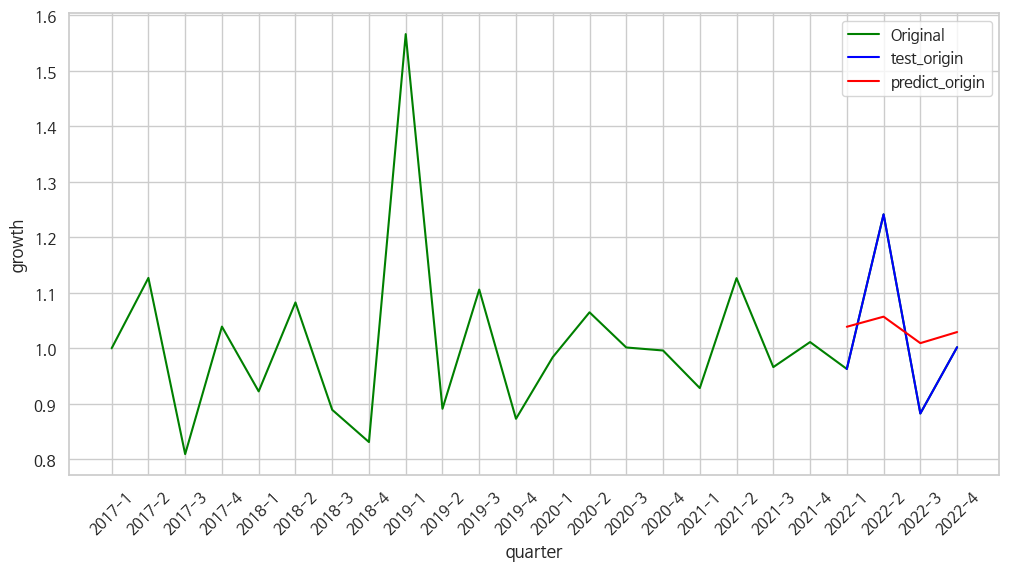

In [41]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [42]:
## error의 요약 통계량
error.describe()

count    4.000000
mean    -0.011414
std      0.136583
min     -0.126615
25%     -0.088634
50%     -0.051631
75%      0.025589
max      0.184223
dtype: float64

In [43]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 19ms/step
[[0.29030913]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0290642976760864 


## 23년 1분기 시장성 예측

In [44]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_glasses[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_glasses.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액    순점포증감률
0   1.000000  2639009592  0.000000
1   1.126753  2973513016  0.000000
2   0.809543  2407186285 -4.545455
3   1.039087  2501277139 -4.761905
4   0.922463  2307336355  0.000000
5   1.082591  2497901558  4.545455
6   0.889315  2221422464  0.000000
7   0.831219  1846488944  4.347826
8   1.565707  2891061395  4.166667
9   0.891150  2576370750  4.000000
10  1.105738  2848790161 -4.000000
11  0.873119  2487332547  0.000000
12  0.984095  2447772617  0.000000
13  1.064829  2606459555 -4.761905
14  1.001510  2610395965  0.000000
15  0.996088  2600185061  0.000000
16  0.928437  2414108555  0.000000
17  1.126303  2719017695  0.000000
18  0.966173  2627040878  0.000000
19  1.011257  2656613352  9.523810
20  0.962823  2557847897  0.000000
21  1.241209  3174822798  0.000000
22  0.882710  2802446311  0.000000
23  1.001989  2808020188  4.545455
--------------------------------------------------------------------------------
             시장성
0  -1.413315e+07
1  -2.0084

In [45]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [46]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [47]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.09676022 0.71966649 0.33333333]
 [0.25450289 0.72386264 0.65151515]]


In [48]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [49]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1516
Epoch 1: val_loss improved from inf to 0.61158, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1516 - val_loss: 0.6116
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1508
Epoch 2: val_loss improved from 0.61158 to 0.60997, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.1508 - val_loss: 0.6100
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1501
Epoch 3: val_loss improved from 0.60997 to 0.60836, saving model to stock_model.h5
1/1 [==============================] - 0s 105ms/step - loss: 0.1501 - val_loss: 0.6084
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1493
Epoch 4: val_loss improved from 0.60836 to 0.60675, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.1493 - val_loss: 0.6068
Epoch 5/300
1/1 [===============

In [51]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 595ms/step
[[0.366096  ]
 [0.41793045]
 [0.34072843]
 [0.38229308]]


In [52]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.708375,0.366096
2022-2,1.000000,0.417930
2022-3,0.832806,0.340728
2022-4,0.773097,0.382293


In [53]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 5].values       # 시장성이 ap_glasses의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.708375,0.366096,3.280120e+07,7247524.5,2.555367e+07
2022-2,1.000000,0.417930,5.457317e+07,11117352.0,4.345582e+07
2022-3,0.832806,0.340728,4.209091e+07,5353647.5,3.673726e+07
2022-4,0.773097,0.382293,3.763321e+07,8456757.0,2.917645e+07


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


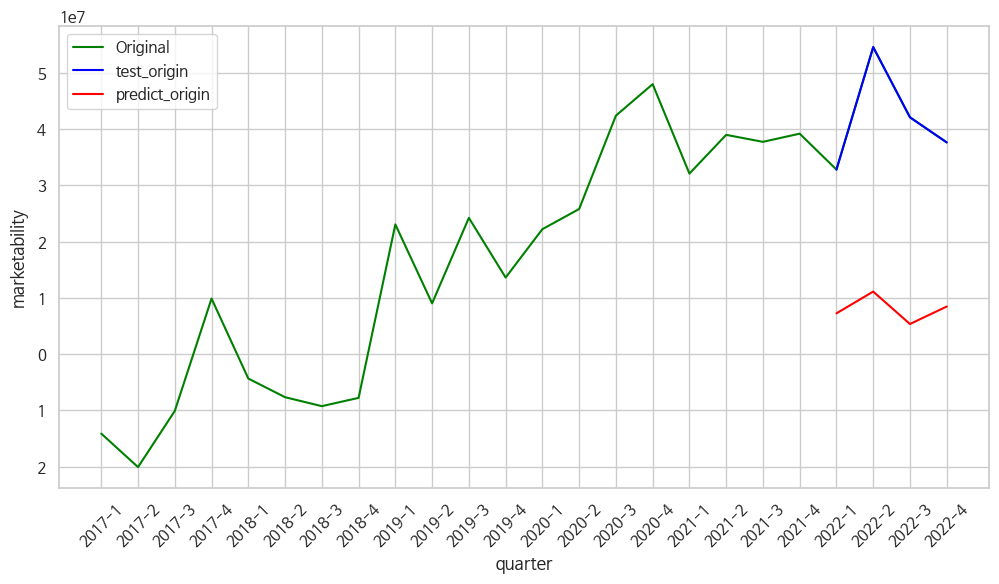

In [54]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [55]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.373080e+07
std      7.983781e+06
min      2.555367e+07
25%      2.827076e+07
50%      3.295686e+07
75%      3.841690e+07
max      4.345582e+07
dtype: float64

In [56]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 19ms/step
[[0.34250498]]
--------------------------------------------------------------------------------
예측된 시장성  : 5486280.0 


## 23년 1분기 순점포증감률 예측

In [57]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_glasses[['성장성', '분기당_매출_금액', '시장성']]
y = ap_glasses.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000  2639009592 -1.413315e+07
1   1.126753  2973513016 -2.008426e+07
2   0.809543  2407186285 -1.010021e+07
3   1.039087  2501277139  9.875845e+06
4   0.922463  2307336355 -4.344723e+06
5   1.082591  2497901558 -7.657134e+06
6   0.889315  2221422464 -9.250249e+06
7   0.831219  1846488944 -7.778654e+06
8   1.565707  2891061395  2.305281e+07
9   0.891150  2576370750  9.024241e+06
10  1.105738  2848790161  2.422192e+07
11  0.873119  2487332547  1.361433e+07
12  0.984095  2447772617  2.220935e+07
13  1.064829  2606459555  2.579037e+07
14  1.001510  2610395965  4.239485e+07
15  0.996088  2600185061  4.798426e+07
16  0.928437  2414108555  3.208893e+07
17  1.126303  2719017695  3.897579e+07
18  0.966173  2627040878  3.773355e+07
19  1.011257  2656613352  3.918644e+07
20  0.962823  2557847897  3.280120e+07
21  1.241209  3174822798  5.457317e+07
22  0.882710  2802446311  4.209091e+07
23  1.001989  2808020188  3.763321e+07
-------------------------

In [58]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [59]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [60]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.09676022 0.71966649 0.83280617]
 [0.25450289 0.72386264 0.77309746]]


In [61]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [62]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [63]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2085
Epoch 1: val_loss improved from inf to 0.23239, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2085 - val_loss: 0.2324
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2078
Epoch 2: val_loss improved from 0.23239 to 0.23135, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.2078 - val_loss: 0.2314
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2070
Epoch 3: val_loss improved from 0.23135 to 0.23033, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.2070 - val_loss: 0.2303
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2063
Epoch 4: val_loss improved from 0.23033 to 0.22931, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2063 - val_loss: 0.2293
Epoch 5/300
1/1 [=================

In [64]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 630ms/step
[[0.4012989 ]
 [0.3989982 ]
 [0.42848575]
 [0.48941574]]


In [65]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.333333,0.401299
2022-2,0.333333,0.398998
2022-3,0.333333,0.428486
2022-4,0.651515,0.489416


In [66]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_glasses의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.333333,0.401299,0.000000,0.970937,-0.970937
2022-2,0.333333,0.398998,0.000000,0.938070,-0.938070
2022-3,0.333333,0.428486,0.000000,1.359320,-1.359320
2022-4,0.651515,0.489416,4.545455,2.229749,2.315706


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


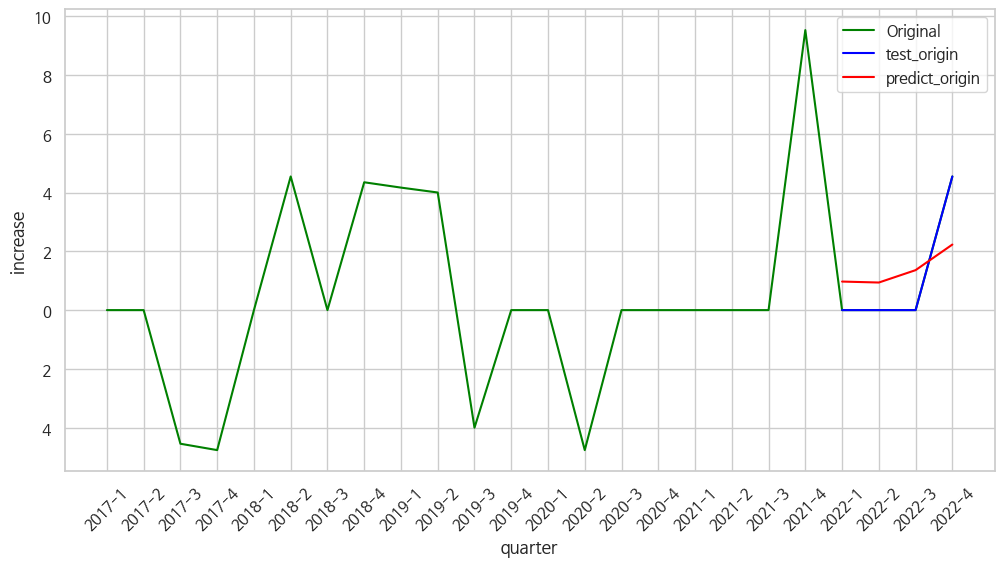

In [67]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [68]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.238155
std      1.713288
min     -1.359320
25%     -1.068033
50%     -0.954503
75%     -0.124626
max      2.315706
dtype: float64

In [69]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 23ms/step
[[0.41277167]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 1.1348333358764648 


## 원본 데이터에 예측값 추가하기

In [70]:
print(sales)
print(growth)
print(marketability)
print(increase)

2492647700.0
1.0290643
5486280.0
1.1348333


In [71]:
ap_glasses.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]

<ipython-input-71-daa77d3d7417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_glasses.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]


In [72]:
ap_glasses

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,안경,2.639010e+09,1.000000,0.000000,-1.413315e+07
1,2017-2,안경,2.973513e+09,1.126753,0.000000,-2.008426e+07
2,2017-3,안경,2.407186e+09,0.809543,-4.545455,-1.010021e+07
3,2017-4,안경,2.501277e+09,1.039087,-4.761905,9.875845e+06
4,2018-1,안경,2.307336e+09,0.922463,0.000000,-4.344723e+06
5,2018-2,안경,2.497902e+09,1.082591,4.545455,-7.657134e+06
6,2018-3,안경,2.221422e+09,0.889315,0.000000,-9.250249e+06
7,2018-4,안경,1.846489e+09,0.831219,4.347826,-7.778654e+06
8,2019-1,안경,2.891061e+09,1.565707,4.166667,2.305281e+07
9,2019-2,안경,2.576371e+09,0.891150,4.000000,9.024241e+06


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [73]:
### X / y 데이터 생성
X = ap_glasses[['성장성', '시장성', '순점포증감률']]
y = ap_glasses.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.413315e+07  0.000000
1   1.126753 -2.008426e+07  0.000000
2   0.809543 -1.010021e+07 -4.545455
3   1.039087  9.875845e+06 -4.761905
4   0.922463 -4.344723e+06  0.000000
5   1.082591 -7.657134e+06  4.545455
6   0.889315 -9.250249e+06  0.000000
7   0.831219 -7.778654e+06  4.347826
8   1.565707  2.305281e+07  4.166667
9   0.891150  9.024241e+06  4.000000
10  1.105738  2.422192e+07 -4.000000
11  0.873119  1.361433e+07  0.000000
12  0.984095  2.220935e+07  0.000000
13  1.064829  2.579037e+07 -4.761905
14  1.001510  4.239485e+07  0.000000
15  0.996088  4.798426e+07  0.000000
16  0.928437  3.208893e+07  0.000000
17  1.126303  3.897579e+07  0.000000
18  0.966173  3.773355e+07  0.000000
19  1.011257  3.918644e+07  9.523810
20  0.962823  3.280120e+07  0.000000
21  1.241209  5.457317e+07  0.000000
22  0.882710  4.209091e+07  0.000000
23  1.001989  3.763321e+07  4.545455
24  1.029064  5.486280e+06  1.134833
--------------------------------------

In [74]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [75]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.25450289 0.77309746 0.65151515]
 [0.29030907 0.34250498 0.41277167]]


In [76]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [77]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [78]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2703
Epoch 1: val_loss improved from inf to 0.36345, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.2703 - val_loss: 0.3634
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2693
Epoch 2: val_loss improved from 0.36345 to 0.36212, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.2693 - val_loss: 0.3621
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2684
Epoch 3: val_loss improved from 0.36212 to 0.36079, saving model to stock_model.h5
1/1 [==============================] - 0s 69ms/step - loss: 0.2684 - val_loss: 0.3608
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2675
Epoch 4: val_loss improved from 0.36079 to 0.35946, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.2675 - val_loss: 0.3595
Epoch 5/300
1/1 [================

In [79]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 872ms/step
[[0.6405947 ]
 [0.5057721 ]
 [0.5556439 ]
 [0.49863893]]


In [80]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,1.000000,0.640595
2022-3,0.719666,0.505772
2022-4,0.723863,0.555644
2023-1,0.486443,0.498639


In [81]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_glasses의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,1.000000,0.640595,3.174823e+09,2.697413e+09,477410190.0
2022-3,0.719666,0.505772,2.802446e+09,2.518323e+09,284123111.0
2022-4,0.723863,0.555644,2.808020e+09,2.584570e+09,223450588.0
2023-1,0.486443,0.498639,2.492648e+09,2.508848e+09,-16200192.0


In [82]:
df_test = df_test.reset_index()

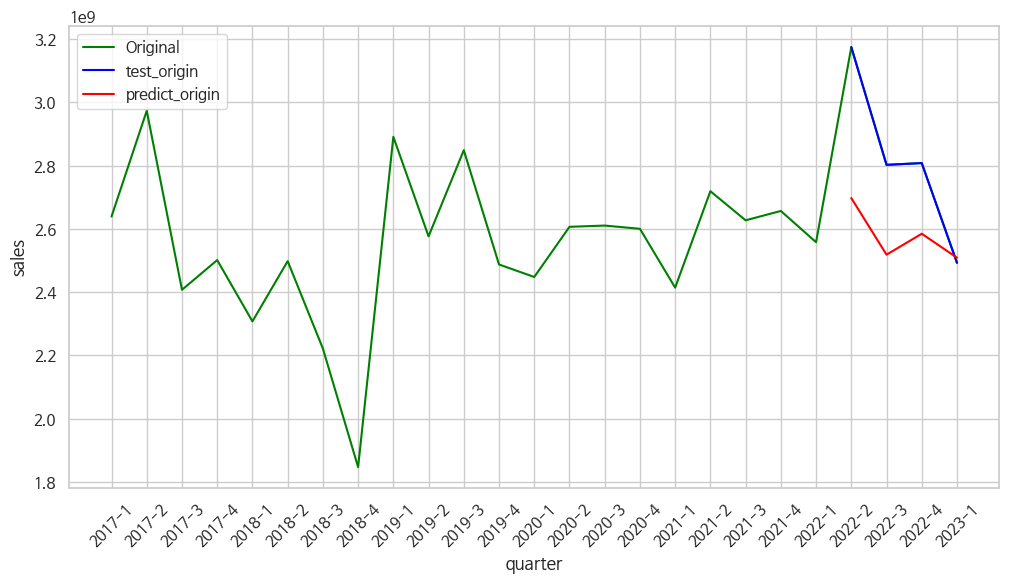

In [83]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [84]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.421959e+08
std      2.034728e+08
min     -1.620019e+07
25%      1.635379e+08
50%      2.537868e+08
75%      3.324449e+08
max      4.774102e+08
dtype: float64

In [85]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 38ms/step
[[0.54945725]]
--------------------------------------------------------------------------------
예측된 매출  : 2576351488.0 


### 성장성

In [86]:
### X / y 데이터 생성
X = ap_glasses[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_glasses.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   2.639010e+09 -1.413315e+07  0.000000
1   2.973513e+09 -2.008426e+07  0.000000
2   2.407186e+09 -1.010021e+07 -4.545455
3   2.501277e+09  9.875845e+06 -4.761905
4   2.307336e+09 -4.344723e+06  0.000000
5   2.497902e+09 -7.657134e+06  4.545455
6   2.221422e+09 -9.250249e+06  0.000000
7   1.846489e+09 -7.778654e+06  4.347826
8   2.891061e+09  2.305281e+07  4.166667
9   2.576371e+09  9.024241e+06  4.000000
10  2.848790e+09  2.422192e+07 -4.000000
11  2.487333e+09  1.361433e+07  0.000000
12  2.447773e+09  2.220935e+07  0.000000
13  2.606460e+09  2.579037e+07 -4.761905
14  2.610396e+09  4.239485e+07  0.000000
15  2.600185e+09  4.798426e+07  0.000000
16  2.414109e+09  3.208893e+07  0.000000
17  2.719018e+09  3.897579e+07  0.000000
18  2.627041e+09  3.773355e+07  0.000000
19  2.656613e+09  3.918644e+07  9.523810
20  2.557848e+09  3.280120e+07  0.000000
21  3.174823e+09  5.457317e+07  0.000000
22  2.802446e+09  4.209091e+07  0.000000
23  2.808020e+09

In [87]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [88]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.72386264 0.77309746 0.65151515]
 [0.48644302 0.34250498 0.41277167]]


In [89]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [90]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [91]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1440
Epoch 1: val_loss improved from inf to 0.09354, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1440 - val_loss: 0.0935
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1434
Epoch 2: val_loss improved from 0.09354 to 0.09281, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.1434 - val_loss: 0.0928
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1429
Epoch 3: val_loss improved from 0.09281 to 0.09209, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1429 - val_loss: 0.0921
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1423
Epoch 4: val_loss improved from 0.09209 to 0.09137, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.1423 - val_loss: 0.0914
Epoch 5/300
1/1 [=================

In [92]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 598ms/step
[[0.32694513]
 [0.27040625]
 [0.29962116]
 [0.29553008]]


In [93]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.570862,0.326945
2022-3,0.096760,0.270406
2022-4,0.254503,0.299621
2023-1,0.290309,0.295530


In [94]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 3].values       # 성장성이 ap_glasses의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.570862,0.326945,1.241209,1.056767,0.184441
2022-3,0.096760,0.270406,0.882710,1.014014,-0.131305
2022-4,0.254503,0.299621,1.001989,1.036106,-0.034117
2023-1,0.290309,0.295530,1.029064,1.033012,-0.003948


In [95]:
df_test = df_test.reset_index()

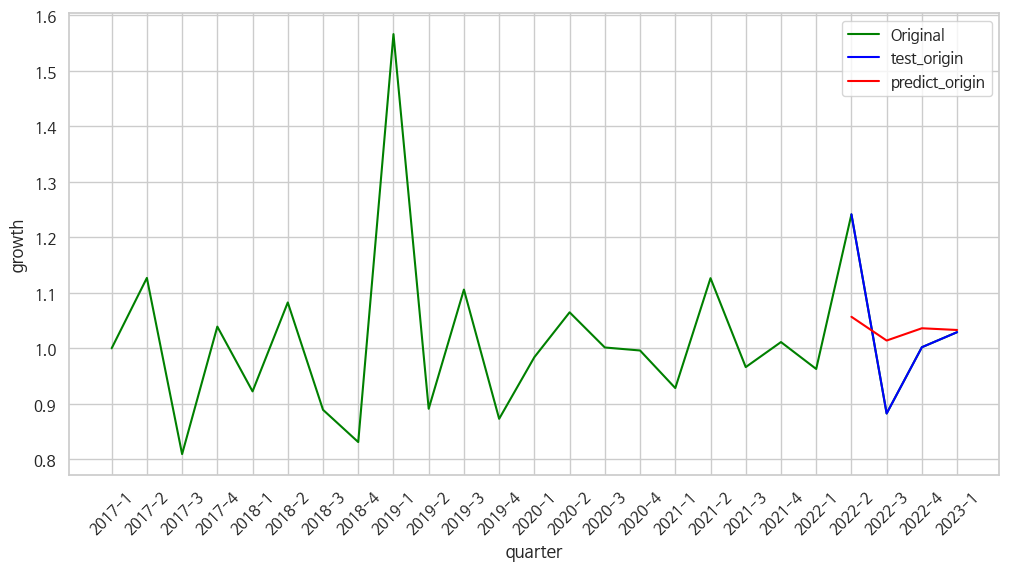

In [96]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [97]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.003768
std      0.132139
min     -0.131305
25%     -0.058414
50%     -0.019032
75%      0.043149
max      0.184441
dtype: float64

In [98]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 21ms/step
[[0.29644254]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0337022542953491 


### 시장성

In [99]:
### X / y 데이터 생성
X = ap_glasses[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_glasses.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   2.639010e+09  1.000000  0.000000
1   2.973513e+09  1.126753  0.000000
2   2.407186e+09  0.809543 -4.545455
3   2.501277e+09  1.039087 -4.761905
4   2.307336e+09  0.922463  0.000000
5   2.497902e+09  1.082591  4.545455
6   2.221422e+09  0.889315  0.000000
7   1.846489e+09  0.831219  4.347826
8   2.891061e+09  1.565707  4.166667
9   2.576371e+09  0.891150  4.000000
10  2.848790e+09  1.105738 -4.000000
11  2.487333e+09  0.873119  0.000000
12  2.447773e+09  0.984095  0.000000
13  2.606460e+09  1.064829 -4.761905
14  2.610396e+09  1.001510  0.000000
15  2.600185e+09  0.996088  0.000000
16  2.414109e+09  0.928437  0.000000
17  2.719018e+09  1.126303  0.000000
18  2.627041e+09  0.966173  0.000000
19  2.656613e+09  1.011257  9.523810
20  2.557848e+09  0.962823  0.000000
21  3.174823e+09  1.241209  0.000000
22  2.802446e+09  0.882710  0.000000
23  2.808020e+09  1.001989  4.545455
24  2.492648e+09  1.029064  1.134833
--------------------------------------

In [100]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [101]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.72386264 0.25450289 0.65151515]
 [0.48644302 0.29030907 0.41277167]]


In [102]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [103]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [104]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1649
Epoch 1: val_loss improved from inf to 0.62023, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.1649 - val_loss: 0.6202
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1641
Epoch 2: val_loss improved from 0.62023 to 0.61860, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1641 - val_loss: 0.6186
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1633
Epoch 3: val_loss improved from 0.61860 to 0.61697, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1633 - val_loss: 0.6170
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1626
Epoch 4: val_loss improved from 0.61697 to 0.61535, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.1626 - val_loss: 0.6153
Epoch 5/300
1/1 [=================

In [105]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 706ms/step
[[0.44213614]
 [0.3780739 ]
 [0.43550447]
 [0.39149833]]


In [106]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,1.000000,0.442136
2022-3,0.832806,0.378074
2022-4,0.773097,0.435504
2023-1,0.342505,0.391498


In [107]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 5].values       # 시장성이 ap_glasses의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,1.000000,0.442136,5.457317e+07,12924486.0,4.164868e+07
2022-3,0.832806,0.378074,4.209091e+07,8141764.5,3.394914e+07
2022-4,0.773097,0.435504,3.763321e+07,12429383.0,2.520383e+07
2023-1,0.342505,0.391498,5.486280e+06,9143998.0,-3.657718e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


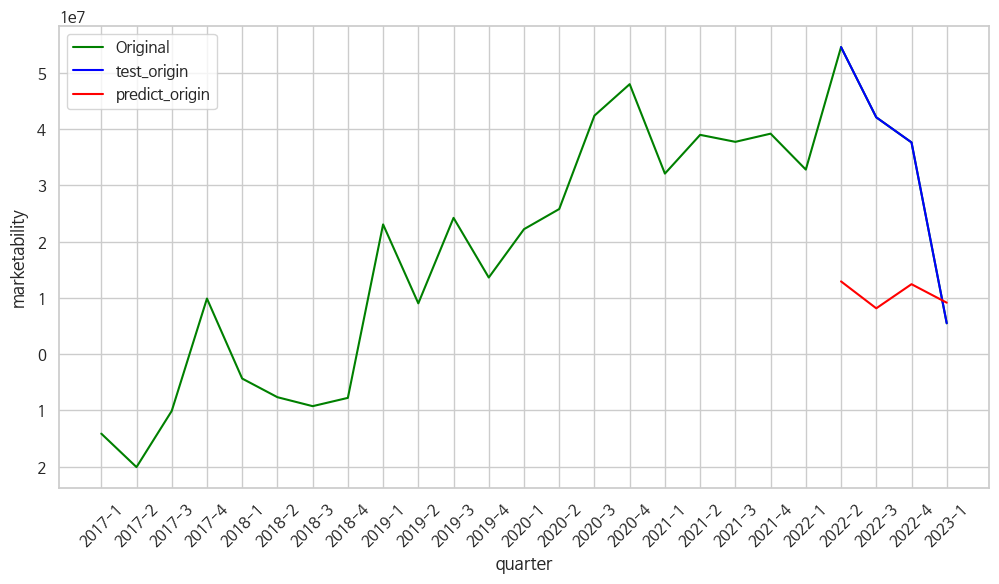

In [108]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [109]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.428598e+07
std      1.980348e+07
min     -3.657718e+06
25%      1.798844e+07
50%      2.957648e+07
75%      3.587403e+07
max      4.164868e+07
dtype: float64

In [110]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 27ms/step
[[0.4144405]]
--------------------------------------------------------------------------------
예측된 시장성  : 10856802.0 


### 순점포증감률

In [111]:
### X / y 데이터 생성
X = ap_glasses[['분기당_매출_금액', '성장성', '시장성']]
y = ap_glasses.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.639010e+09  1.000000 -1.413315e+07
1   2.973513e+09  1.126753 -2.008426e+07
2   2.407186e+09  0.809543 -1.010021e+07
3   2.501277e+09  1.039087  9.875845e+06
4   2.307336e+09  0.922463 -4.344723e+06
5   2.497902e+09  1.082591 -7.657134e+06
6   2.221422e+09  0.889315 -9.250249e+06
7   1.846489e+09  0.831219 -7.778654e+06
8   2.891061e+09  1.565707  2.305281e+07
9   2.576371e+09  0.891150  9.024241e+06
10  2.848790e+09  1.105738  2.422192e+07
11  2.487333e+09  0.873119  1.361433e+07
12  2.447773e+09  0.984095  2.220935e+07
13  2.606460e+09  1.064829  2.579037e+07
14  2.610396e+09  1.001510  4.239485e+07
15  2.600185e+09  0.996088  4.798426e+07
16  2.414109e+09  0.928437  3.208893e+07
17  2.719018e+09  1.126303  3.897579e+07
18  2.627041e+09  0.966173  3.773355e+07
19  2.656613e+09  1.011257  3.918644e+07
20  2.557848e+09  0.962823  3.280120e+07
21  3.174823e+09  1.241209  5.457317e+07
22  2.802446e+09  0.882710  4.209091e+07
23  2.808020e+09

In [112]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [113]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.72386264 0.25450289 0.77309746]
 [0.48644302 0.29030907 0.34250498]]


In [114]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [115]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [116]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1975
Epoch 1: val_loss improved from inf to 0.22481, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1975 - val_loss: 0.2248
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1968
Epoch 2: val_loss improved from 0.22481 to 0.22381, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.1968 - val_loss: 0.2238
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1961
Epoch 3: val_loss improved from 0.22381 to 0.22282, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1961 - val_loss: 0.2228
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1954
Epoch 4: val_loss improved from 0.22282 to 0.22184, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.1954 - val_loss: 0.2218
Epoch 5/300
1/1 [=================

In [117]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 926ms/step
[[0.39618155]
 [0.42546016]
 [0.49051446]
 [0.42208576]]


In [118]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.333333,0.396182
2022-3,0.333333,0.425460
2022-4,0.651515,0.490514
2023-1,0.412772,0.422086


In [119]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_glasses의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.333333,0.396182,0.000000,0.897832,-0.897832
2022-3,0.333333,0.425460,0.000000,1.316097,-1.316097
2022-4,0.651515,0.490514,4.545455,2.245445,2.300010
2023-1,0.412772,0.422086,1.134833,1.267892,-0.133058


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


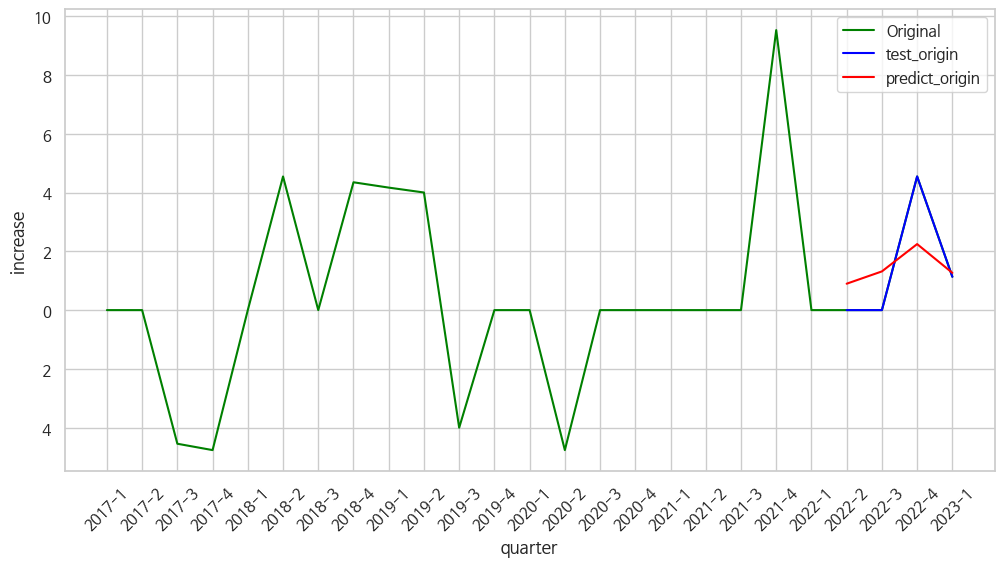

In [120]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [121]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.011744
std      1.617139
min     -1.316097
25%     -1.002398
50%     -0.515445
75%      0.475209
max      2.300010
dtype: float64

In [122]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 19ms/step
[[0.3805116]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 0.67397540807724 


### 추가


In [123]:
ap_glasses.loc[25] = ['2023-2', '안경수리리', sales, growth, increase, marketability]

<ipython-input-123-41fab4695d23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_glasses.loc[25] = ['2023-2', '안경수리리', sales, growth, increase, marketability]


In [124]:
ap_glasses

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,안경,2.639010e+09,1.000000,0.000000,-1.413315e+07
1,2017-2,안경,2.973513e+09,1.126753,0.000000,-2.008426e+07
2,2017-3,안경,2.407186e+09,0.809543,-4.545455,-1.010021e+07
3,2017-4,안경,2.501277e+09,1.039087,-4.761905,9.875845e+06
4,2018-1,안경,2.307336e+09,0.922463,0.000000,-4.344723e+06
5,2018-2,안경,2.497902e+09,1.082591,4.545455,-7.657134e+06
6,2018-3,안경,2.221422e+09,0.889315,0.000000,-9.250249e+06
7,2018-4,안경,1.846489e+09,0.831219,4.347826,-7.778654e+06
8,2019-1,안경,2.891061e+09,1.565707,4.166667,2.305281e+07
9,2019-2,안경,2.576371e+09,0.891150,4.000000,9.024241e+06


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [125]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_glasses[['성장성', '시장성', '순점포증감률']]
y = ap_glasses.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.413315e+07  0.000000
1   1.126753 -2.008426e+07  0.000000
2   0.809543 -1.010021e+07 -4.545455
3   1.039087  9.875845e+06 -4.761905
4   0.922463 -4.344723e+06  0.000000
5   1.082591 -7.657134e+06  4.545455
6   0.889315 -9.250249e+06  0.000000
7   0.831219 -7.778654e+06  4.347826
8   1.565707  2.305281e+07  4.166667
9   0.891150  9.024241e+06  4.000000
10  1.105738  2.422192e+07 -4.000000
11  0.873119  1.361433e+07  0.000000
12  0.984095  2.220935e+07  0.000000
13  1.064829  2.579037e+07 -4.761905
14  1.001510  4.239485e+07  0.000000
15  0.996088  4.798426e+07  0.000000
16  0.928437  3.208893e+07  0.000000
17  1.126303  3.897579e+07  0.000000
18  0.966173  3.773355e+07  0.000000
19  1.011257  3.918644e+07  9.523810
20  0.962823  3.280120e+07  0.000000
21  1.241209  5.457317e+07  0.000000
22  0.882710  4.209091e+07  0.000000
23  1.001989  3.763321e+07  4.545455
24  1.029064  5.486280e+06  1.134833
25  1.033702  1.085680e+07  0.673975
-

In [126]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [127]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.29030907 0.34250498 0.41277167]
 [0.2964426  0.41444051 0.38051161]]


In [128]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [129]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [130]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2775
Epoch 1: val_loss improved from inf to 0.45380, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.2775 - val_loss: 0.4538
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2765
Epoch 2: val_loss improved from 0.45380 to 0.45224, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.2765 - val_loss: 0.4522
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2756
Epoch 3: val_loss improved from 0.45224 to 0.45069, saving model to stock_model.h5
1/1 [==============================] - 0s 69ms/step - loss: 0.2756 - val_loss: 0.4507
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2746
Epoch 4: val_loss improved from 0.45069 to 0.44915, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2746 - val_loss: 0.4491
Epoch 5/300
1/1 [=================

In [131]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 620ms/step
[[0.5268658]
 [0.5779048]
 [0.5260888]
 [0.5723914]]


In [132]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.719666,0.526866
2022-4,0.723863,0.577905
2023-1,0.486443,0.526089
2023-2,0.549457,0.572391


In [133]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_glasses의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.719666,0.526866,2.802446e+09,2.546343e+09,256103655.0
2022-4,0.723863,0.577905,2.808020e+09,2.614139e+09,193880796.0
2023-1,0.486443,0.526089,2.492648e+09,2.545310e+09,-52662784.0
2023-2,0.549457,0.572391,2.576351e+09,2.606816e+09,-30464256.0


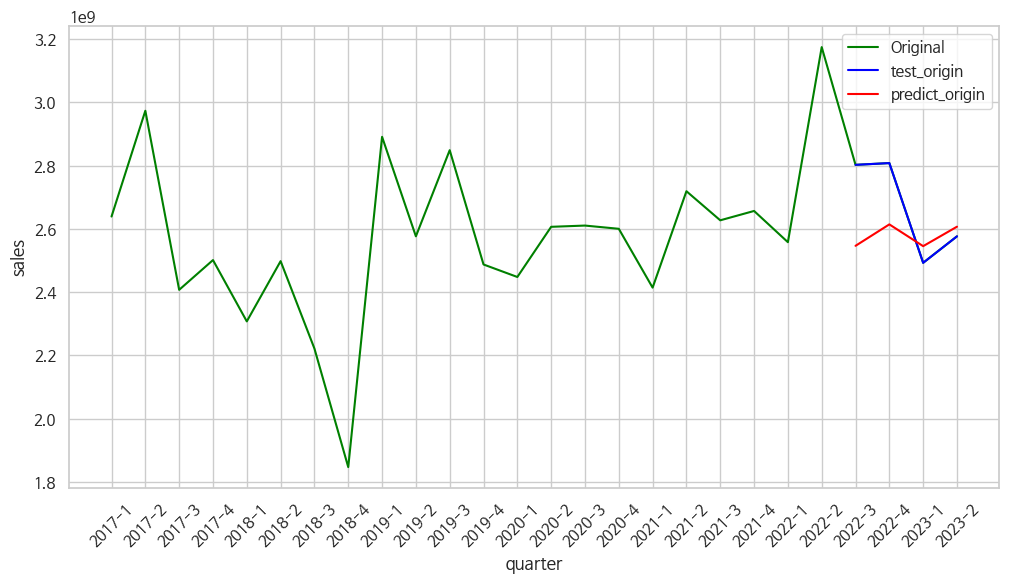

In [134]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [135]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     9.171435e+07
std      1.562415e+08
min     -5.266278e+07
25%     -3.601389e+07
50%      8.170827e+07
75%      2.094365e+08
max      2.561037e+08
dtype: float64

In [136]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 21ms/step
[[0.46823195]]
--------------------------------------------------------------------------------
예측된 매출  : 2468457216.0 


### 성장성

In [137]:
X = ap_glasses[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_glasses.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   2.639010e+09 -1.413315e+07  0.000000
1   2.973513e+09 -2.008426e+07  0.000000
2   2.407186e+09 -1.010021e+07 -4.545455
3   2.501277e+09  9.875845e+06 -4.761905
4   2.307336e+09 -4.344723e+06  0.000000
5   2.497902e+09 -7.657134e+06  4.545455
6   2.221422e+09 -9.250249e+06  0.000000
7   1.846489e+09 -7.778654e+06  4.347826
8   2.891061e+09  2.305281e+07  4.166667
9   2.576371e+09  9.024241e+06  4.000000
10  2.848790e+09  2.422192e+07 -4.000000
11  2.487333e+09  1.361433e+07  0.000000
12  2.447773e+09  2.220935e+07  0.000000
13  2.606460e+09  2.579037e+07 -4.761905
14  2.610396e+09  4.239485e+07  0.000000
15  2.600185e+09  4.798426e+07  0.000000
16  2.414109e+09  3.208893e+07  0.000000
17  2.719018e+09  3.897579e+07  0.000000
18  2.627041e+09  3.773355e+07  0.000000
19  2.656613e+09  3.918644e+07  9.523810
20  2.557848e+09  3.280120e+07  0.000000
21  3.174823e+09  5.457317e+07  0.000000
22  2.802446e+09  4.209091e+07  0.000000
23  2.808020e+09

In [138]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [139]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.48644302 0.34250498 0.41277167]
 [0.54945716 0.41444051 0.38051161]]


In [140]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [141]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [142]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1430
Epoch 1: val_loss improved from inf to 0.12367, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1430 - val_loss: 0.1237
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1425
Epoch 2: val_loss improved from 0.12367 to 0.12282, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1425 - val_loss: 0.1228
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1419
Epoch 3: val_loss improved from 0.12282 to 0.12197, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.1419 - val_loss: 0.1220
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1413
Epoch 4: val_loss improved from 0.12197 to 0.12112, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.1413 - val_loss: 0.1211
Epoch 5/300
1/1 [=================

In [143]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 590ms/step
[[0.2860503 ]
 [0.31817055]
 [0.31112012]
 [0.30979207]]


In [144]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.096760,0.286050
2022-4,0.254503,0.318171
2023-1,0.290309,0.311120
2023-2,0.296443,0.309792


In [145]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 3].values       # 성장성이 ap_glasses의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.096760,0.286050,0.882710,1.025844,-0.143134
2022-4,0.254503,0.318171,1.001989,1.050132,-0.048143
2023-1,0.290309,0.311120,1.029064,1.044801,-0.015737
2023-2,0.296443,0.309792,1.033702,1.043797,-0.010094


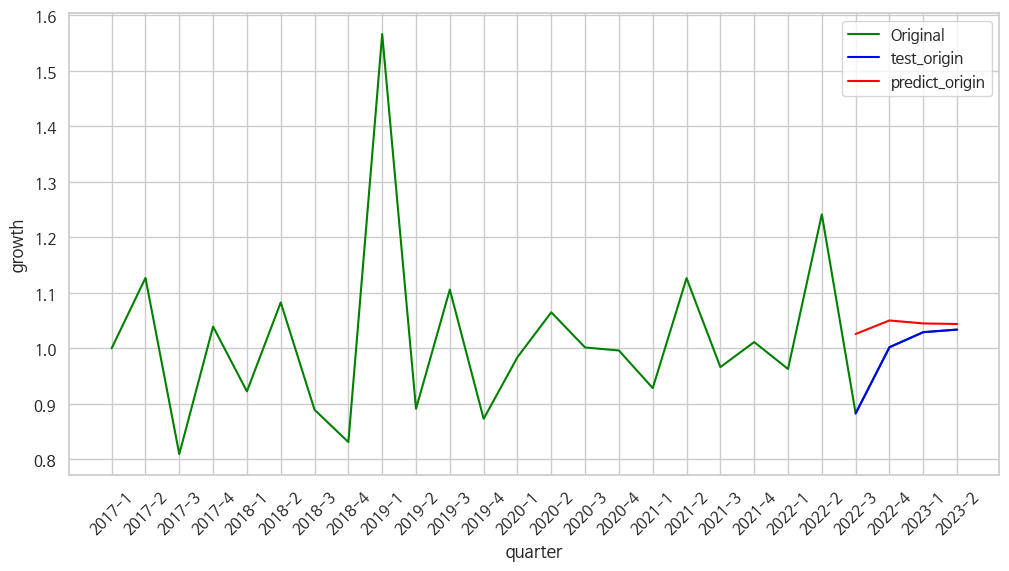

In [146]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [147]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.054277
std      0.061565
min     -0.143134
25%     -0.071891
50%     -0.031940
75%     -0.014326
max     -0.010094
dtype: float64

In [148]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 19ms/step
[[0.2546227]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0020796060562134 


### 시장성

In [149]:
### X / y 데이터 생성
X = ap_glasses[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_glasses.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   2.639010e+09  1.000000  0.000000
1   2.973513e+09  1.126753  0.000000
2   2.407186e+09  0.809543 -4.545455
3   2.501277e+09  1.039087 -4.761905
4   2.307336e+09  0.922463  0.000000
5   2.497902e+09  1.082591  4.545455
6   2.221422e+09  0.889315  0.000000
7   1.846489e+09  0.831219  4.347826
8   2.891061e+09  1.565707  4.166667
9   2.576371e+09  0.891150  4.000000
10  2.848790e+09  1.105738 -4.000000
11  2.487333e+09  0.873119  0.000000
12  2.447773e+09  0.984095  0.000000
13  2.606460e+09  1.064829 -4.761905
14  2.610396e+09  1.001510  0.000000
15  2.600185e+09  0.996088  0.000000
16  2.414109e+09  0.928437  0.000000
17  2.719018e+09  1.126303  0.000000
18  2.627041e+09  0.966173  0.000000
19  2.656613e+09  1.011257  9.523810
20  2.557848e+09  0.962823  0.000000
21  3.174823e+09  1.241209  0.000000
22  2.802446e+09  0.882710  0.000000
23  2.808020e+09  1.001989  4.545455
24  2.492648e+09  1.029064  1.134833
25  2.576351e+09  1.033702  0.673975
-

In [150]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [151]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.48644302 0.29030907 0.41277167]
 [0.54945716 0.2964426  0.38051161]]


In [152]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [153]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [154]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1840
Epoch 1: val_loss improved from inf to 0.70131, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.1840 - val_loss: 0.7013
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1831
Epoch 2: val_loss improved from 0.70131 to 0.69951, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.1831 - val_loss: 0.6995
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1823
Epoch 3: val_loss improved from 0.69951 to 0.69771, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.1823 - val_loss: 0.6977
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1815
Epoch 4: val_loss improved from 0.69771 to 0.69591, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.1815 - val_loss: 0.6959
Epoch 5/300
1/1 [=================

In [155]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 605ms/step
[[0.4020327 ]
 [0.46387944]
 [0.41844583]
 [0.4405878 ]]


In [156]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.832806,0.402033
2022-4,0.773097,0.463879
2023-1,0.342505,0.418446
2023-2,0.414441,0.440588


In [157]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 5].values       # 시장성이 ap_glasses의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.832806,0.402033,4.209091e+07,9930467.0,3.216044e+07
2022-4,0.773097,0.463879,3.763321e+07,14547785.0,2.308542e+07
2023-1,0.342505,0.418446,5.486280e+06,11155828.0,-5.669548e+06
2023-2,0.414441,0.440588,1.085680e+07,12808890.0,-1.952088e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


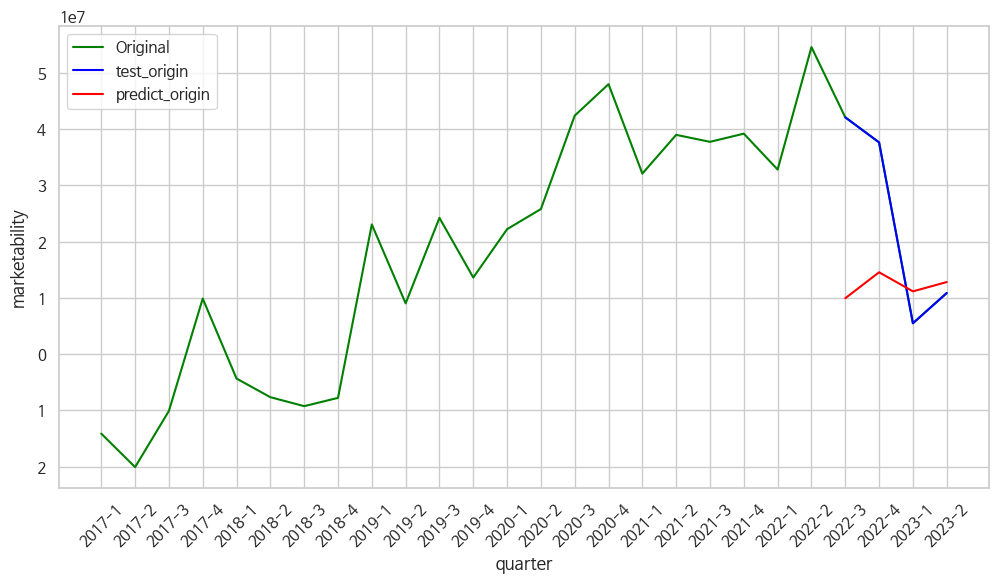

In [158]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [159]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.190606e+07
std      1.858466e+07
min     -5.669548e+06
25%     -2.881453e+06
50%      1.056667e+07
75%      2.535418e+07
max      3.216044e+07
dtype: float64

In [160]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 28ms/step
[[0.37428978]]
--------------------------------------------------------------------------------
예측된 시장성  : 7859252.0 


### 순점포증감률

In [161]:
### X / y 데이터 생성
X = ap_glasses[['분기당_매출_금액', '성장성', '시장성']]
y = ap_glasses.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.639010e+09  1.000000 -1.413315e+07
1   2.973513e+09  1.126753 -2.008426e+07
2   2.407186e+09  0.809543 -1.010021e+07
3   2.501277e+09  1.039087  9.875845e+06
4   2.307336e+09  0.922463 -4.344723e+06
5   2.497902e+09  1.082591 -7.657134e+06
6   2.221422e+09  0.889315 -9.250249e+06
7   1.846489e+09  0.831219 -7.778654e+06
8   2.891061e+09  1.565707  2.305281e+07
9   2.576371e+09  0.891150  9.024241e+06
10  2.848790e+09  1.105738  2.422192e+07
11  2.487333e+09  0.873119  1.361433e+07
12  2.447773e+09  0.984095  2.220935e+07
13  2.606460e+09  1.064829  2.579037e+07
14  2.610396e+09  1.001510  4.239485e+07
15  2.600185e+09  0.996088  4.798426e+07
16  2.414109e+09  0.928437  3.208893e+07
17  2.719018e+09  1.126303  3.897579e+07
18  2.627041e+09  0.966173  3.773355e+07
19  2.656613e+09  1.011257  3.918644e+07
20  2.557848e+09  0.962823  3.280120e+07
21  3.174823e+09  1.241209  5.457317e+07
22  2.802446e+09  0.882710  4.209091e+07
23  2.808020e+09

In [162]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [163]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.48644302 0.29030907 0.34250498]
 [0.54945716 0.2964426  0.41444051]]


In [164]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [165]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [166]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1810
Epoch 1: val_loss improved from inf to 0.24039, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1810 - val_loss: 0.2404
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1804
Epoch 2: val_loss improved from 0.24039 to 0.23929, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.1804 - val_loss: 0.2393
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1797
Epoch 3: val_loss improved from 0.23929 to 0.23820, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1797 - val_loss: 0.2382
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1791
Epoch 4: val_loss improved from 0.23820 to 0.23710, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.1791 - val_loss: 0.2371
Epoch 5/300
1/1 [=================

In [167]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 597ms/step
[[0.40514135]
 [0.45846212]
 [0.4003272 ]
 [0.36348528]]


In [168]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.333333,0.405141
2022-4,0.651515,0.458462
2023-1,0.412772,0.400327
2023-2,0.380512,0.363485


In [169]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_glasses의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.333333,0.405141,0.000000,1.025829,-1.025829
2022-4,0.651515,0.458462,4.545455,1.787554,2.757900
2023-1,0.412772,0.400327,1.134833,0.957055,0.177778
2023-2,0.380512,0.363485,0.673975,0.430742,0.243233


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


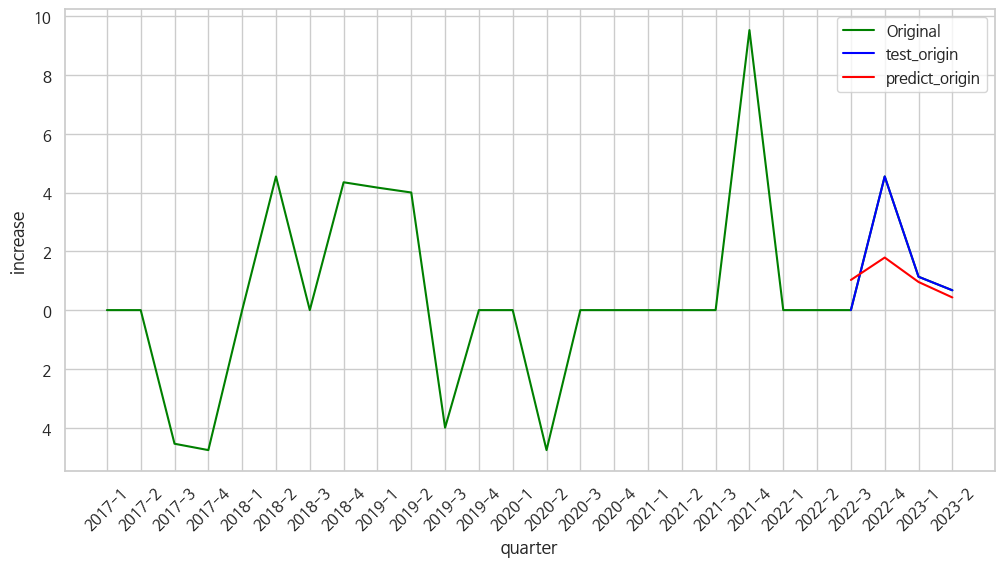

In [170]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [171]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.538271
std      1.590615
min     -1.025829
25%     -0.123124
50%      0.210506
75%      0.871900
max      2.757900
dtype: float64

In [172]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 19ms/step
[[0.3021167]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.44595202803611755 


### 추가

In [173]:
ap_glasses.loc[26] = ['2023-3', '안경', sales, growth, increase, marketability]

<ipython-input-173-1ac40c7f07f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_glasses.loc[26] = ['2023-3', '안경', sales, growth, increase, marketability]


In [174]:
ap_glasses

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,안경,2.639010e+09,1.000000,0.000000,-1.413315e+07
1,2017-2,안경,2.973513e+09,1.126753,0.000000,-2.008426e+07
2,2017-3,안경,2.407186e+09,0.809543,-4.545455,-1.010021e+07
3,2017-4,안경,2.501277e+09,1.039087,-4.761905,9.875845e+06
4,2018-1,안경,2.307336e+09,0.922463,0.000000,-4.344723e+06
5,2018-2,안경,2.497902e+09,1.082591,4.545455,-7.657134e+06
6,2018-3,안경,2.221422e+09,0.889315,0.000000,-9.250249e+06
7,2018-4,안경,1.846489e+09,0.831219,4.347826,-7.778654e+06
8,2019-1,안경,2.891061e+09,1.565707,4.166667,2.305281e+07
9,2019-2,안경,2.576371e+09,0.891150,4.000000,9.024241e+06


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [175]:
### X / y 데이터 생성
X = ap_glasses[['성장성', '시장성', '순점포증감률']]
y = ap_glasses.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.413315e+07  0.000000
1   1.126753 -2.008426e+07  0.000000
2   0.809543 -1.010021e+07 -4.545455
3   1.039087  9.875845e+06 -4.761905
4   0.922463 -4.344723e+06  0.000000
5   1.082591 -7.657134e+06  4.545455
6   0.889315 -9.250249e+06  0.000000
7   0.831219 -7.778654e+06  4.347826
8   1.565707  2.305281e+07  4.166667
9   0.891150  9.024241e+06  4.000000
10  1.105738  2.422192e+07 -4.000000
11  0.873119  1.361433e+07  0.000000
12  0.984095  2.220935e+07  0.000000
13  1.064829  2.579037e+07 -4.761905
14  1.001510  4.239485e+07  0.000000
15  0.996088  4.798426e+07  0.000000
16  0.928437  3.208893e+07  0.000000
17  1.126303  3.897579e+07  0.000000
18  0.966173  3.773355e+07  0.000000
19  1.011257  3.918644e+07  9.523810
20  0.962823  3.280120e+07  0.000000
21  1.241209  5.457317e+07  0.000000
22  0.882710  4.209091e+07  0.000000
23  1.001989  3.763321e+07  4.545455
24  1.029064  5.486280e+06  1.134833
25  1.033702  1.085680e+07  0.673975
2

In [176]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [177]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.2964426  0.41444051 0.38051161]
 [0.2546228  0.37428979 0.30211669]]


In [178]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [179]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [180]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2775
Epoch 1: val_loss improved from inf to 0.46718, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.2775 - val_loss: 0.4672
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2765
Epoch 2: val_loss improved from 0.46718 to 0.46559, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2765 - val_loss: 0.4656
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2756
Epoch 3: val_loss improved from 0.46559 to 0.46401, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2756 - val_loss: 0.4640
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2746
Epoch 4: val_loss improved from 0.46401 to 0.46244, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.2746 - val_loss: 0.4624
Epoch 5/300
1/1 [=================

In [181]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 617ms/step
[[0.5779048 ]
 [0.5260888 ]
 [0.5723914 ]
 [0.46823195]]


In [182]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.723863,0.577905
2023-1,0.486443,0.526089
2023-2,0.549457,0.572391
2023-3,0.468232,0.468232


In [183]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_glasses의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.723863,0.577905,2.808020e+09,2.614139e+09,193880796.0
2023-1,0.486443,0.526089,2.492648e+09,2.545310e+09,-52662784.0
2023-2,0.549457,0.572391,2.576351e+09,2.606816e+09,-30464256.0
2023-3,0.468232,0.468232,2.468457e+09,2.468457e+09,0.0


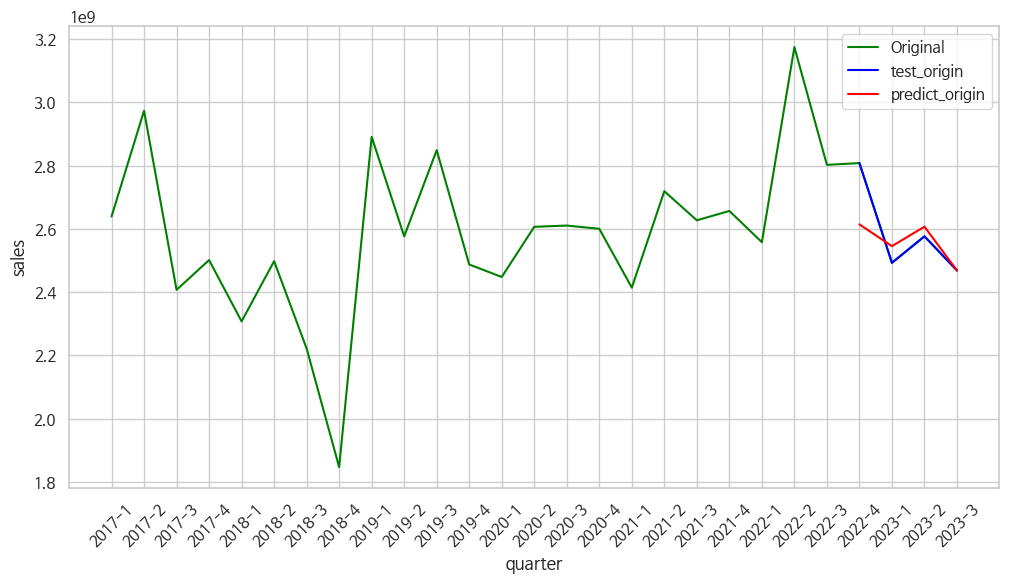

In [184]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [185]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.768844e+07
std      1.128784e+08
min     -5.266278e+07
25%     -3.601389e+07
50%     -1.523213e+07
75%      4.847020e+07
max      1.938808e+08
dtype: float64

In [186]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 21ms/step
[[0.45638272]]
--------------------------------------------------------------------------------
예측된 매출  : 2452717568.0 


### 성장성

In [187]:
X = ap_glasses[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_glasses.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   2.639010e+09 -1.413315e+07  0.000000
1   2.973513e+09 -2.008426e+07  0.000000
2   2.407186e+09 -1.010021e+07 -4.545455
3   2.501277e+09  9.875845e+06 -4.761905
4   2.307336e+09 -4.344723e+06  0.000000
5   2.497902e+09 -7.657134e+06  4.545455
6   2.221422e+09 -9.250249e+06  0.000000
7   1.846489e+09 -7.778654e+06  4.347826
8   2.891061e+09  2.305281e+07  4.166667
9   2.576371e+09  9.024241e+06  4.000000
10  2.848790e+09  2.422192e+07 -4.000000
11  2.487333e+09  1.361433e+07  0.000000
12  2.447773e+09  2.220935e+07  0.000000
13  2.606460e+09  2.579037e+07 -4.761905
14  2.610396e+09  4.239485e+07  0.000000
15  2.600185e+09  4.798426e+07  0.000000
16  2.414109e+09  3.208893e+07  0.000000
17  2.719018e+09  3.897579e+07  0.000000
18  2.627041e+09  3.773355e+07  0.000000
19  2.656613e+09  3.918644e+07  9.523810
20  2.557848e+09  3.280120e+07  0.000000
21  3.174823e+09  5.457317e+07  0.000000
22  2.802446e+09  4.209091e+07  0.000000
23  2.808020e+09

In [188]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [189]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.54945716 0.41444051 0.38051161]
 [0.46823189 0.37428979 0.30211669]]


In [190]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [191]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [192]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1430
Epoch 1: val_loss improved from inf to 0.11200, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1430 - val_loss: 0.1120
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1425
Epoch 2: val_loss improved from 0.11200 to 0.11120, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.1425 - val_loss: 0.1112
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1419
Epoch 3: val_loss improved from 0.11120 to 0.11040, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.1419 - val_loss: 0.1104
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1413
Epoch 4: val_loss improved from 0.11040 to 0.10961, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.1413 - val_loss: 0.1096
Epoch 5/300
1/1 [=================

In [193]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 650ms/step
[[0.31817055]
 [0.31112012]
 [0.30979207]
 [0.2546227 ]]


In [194]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.254503,0.318171
2023-1,0.290309,0.311120
2023-2,0.296443,0.309792
2023-3,0.254623,0.254623


In [195]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 3].values       # 성장성이 ap_glasses의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.254503,0.318171,1.001989,1.050132,-0.048143
2023-1,0.290309,0.311120,1.029064,1.044801,-0.015737
2023-2,0.296443,0.309792,1.033702,1.043797,-0.010094
2023-3,0.254623,0.254623,1.002080,1.002080,0.000000


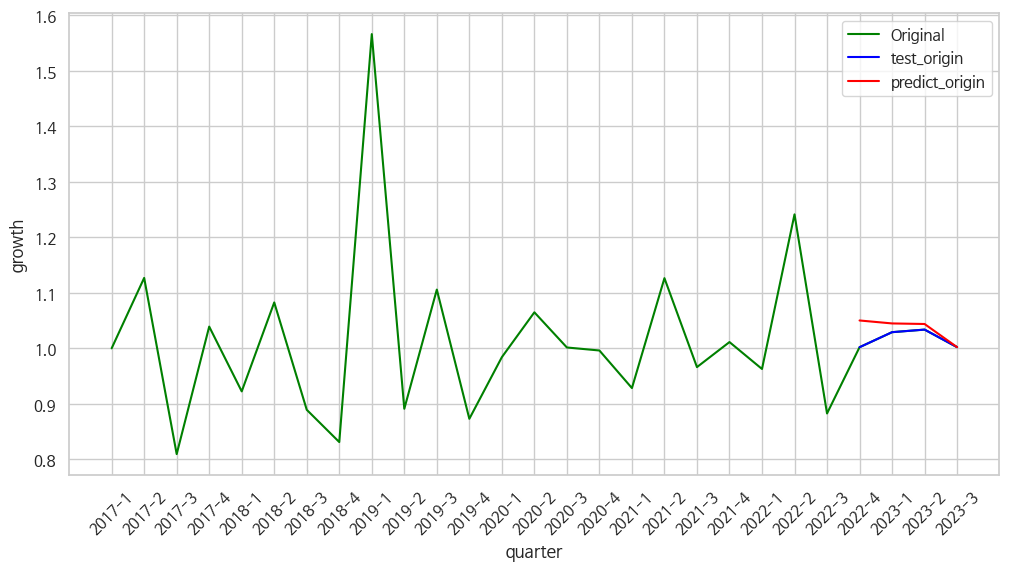

In [196]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [197]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.018494
std      0.020811
min     -0.048143
25%     -0.023838
50%     -0.012915
75%     -0.007571
max      0.000000
dtype: float64

In [198]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 20ms/step
[[0.2512644]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9995400905609131 


###시장성

In [199]:
### X / y 데이터 생성
X = ap_glasses[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_glasses.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   2.639010e+09  1.000000  0.000000
1   2.973513e+09  1.126753  0.000000
2   2.407186e+09  0.809543 -4.545455
3   2.501277e+09  1.039087 -4.761905
4   2.307336e+09  0.922463  0.000000
5   2.497902e+09  1.082591  4.545455
6   2.221422e+09  0.889315  0.000000
7   1.846489e+09  0.831219  4.347826
8   2.891061e+09  1.565707  4.166667
9   2.576371e+09  0.891150  4.000000
10  2.848790e+09  1.105738 -4.000000
11  2.487333e+09  0.873119  0.000000
12  2.447773e+09  0.984095  0.000000
13  2.606460e+09  1.064829 -4.761905
14  2.610396e+09  1.001510  0.000000
15  2.600185e+09  0.996088  0.000000
16  2.414109e+09  0.928437  0.000000
17  2.719018e+09  1.126303  0.000000
18  2.627041e+09  0.966173  0.000000
19  2.656613e+09  1.011257  9.523810
20  2.557848e+09  0.962823  0.000000
21  3.174823e+09  1.241209  0.000000
22  2.802446e+09  0.882710  0.000000
23  2.808020e+09  1.001989  4.545455
24  2.492648e+09  1.029064  1.134833
25  2.576351e+09  1.033702  0.673975
2

In [200]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [201]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.54945716 0.2964426  0.38051161]
 [0.46823189 0.2546228  0.30211669]]


In [202]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [203]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [204]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1840
Epoch 1: val_loss improved from inf to 0.70455, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.1840 - val_loss: 0.7045
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1831
Epoch 2: val_loss improved from 0.70455 to 0.70272, saving model to stock_model.h5
1/1 [==============================] - 0s 67ms/step - loss: 0.1831 - val_loss: 0.7027
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1823
Epoch 3: val_loss improved from 0.70272 to 0.70090, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.1823 - val_loss: 0.7009
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1815
Epoch 4: val_loss improved from 0.70090 to 0.69908, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.1815 - val_loss: 0.6991
Epoch 5/300
1/1 [=================

In [205]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 588ms/step
[[0.46387944]
 [0.41844583]
 [0.4405878 ]
 [0.37428978]]


In [206]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.773097,0.463879
2023-1,0.342505,0.418446
2023-2,0.414441,0.440588
2023-3,0.374290,0.374290


In [207]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 5].values       # 시장성이 ap_glasses의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.773097,0.463879,3.763321e+07,14547785.0,2.308542e+07
2023-1,0.342505,0.418446,5.486280e+06,11155828.0,-5.669548e+06
2023-2,0.414441,0.440588,1.085680e+07,12808890.0,-1.952088e+06
2023-3,0.374290,0.374290,7.859252e+06,7859252.0,0.000000e+00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


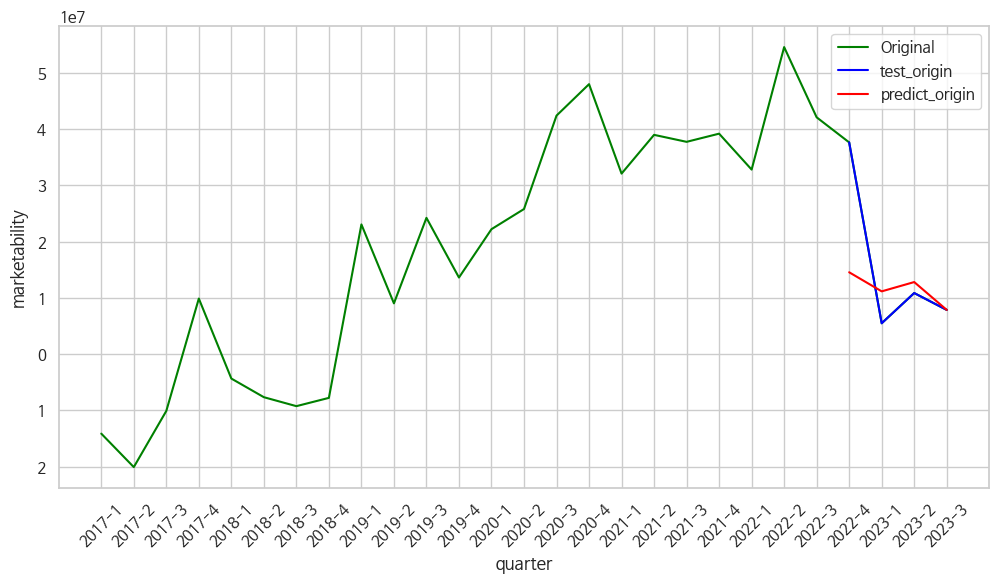

In [208]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [209]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.865947e+06
std      1.302701e+07
min     -5.669548e+06
25%     -2.881453e+06
50%     -9.760440e+05
75%      5.771356e+06
max      2.308542e+07
dtype: float64

In [210]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 21ms/step
[[0.36745]]
--------------------------------------------------------------------------------
예측된 시장성  : 7348611.5 


### 순점포증감률

In [211]:
### X / y 데이터 생성
X = ap_glasses[['분기당_매출_금액', '성장성', '시장성']]
y = ap_glasses.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.639010e+09  1.000000 -1.413315e+07
1   2.973513e+09  1.126753 -2.008426e+07
2   2.407186e+09  0.809543 -1.010021e+07
3   2.501277e+09  1.039087  9.875845e+06
4   2.307336e+09  0.922463 -4.344723e+06
5   2.497902e+09  1.082591 -7.657134e+06
6   2.221422e+09  0.889315 -9.250249e+06
7   1.846489e+09  0.831219 -7.778654e+06
8   2.891061e+09  1.565707  2.305281e+07
9   2.576371e+09  0.891150  9.024241e+06
10  2.848790e+09  1.105738  2.422192e+07
11  2.487333e+09  0.873119  1.361433e+07
12  2.447773e+09  0.984095  2.220935e+07
13  2.606460e+09  1.064829  2.579037e+07
14  2.610396e+09  1.001510  4.239485e+07
15  2.600185e+09  0.996088  4.798426e+07
16  2.414109e+09  0.928437  3.208893e+07
17  2.719018e+09  1.126303  3.897579e+07
18  2.627041e+09  0.966173  3.773355e+07
19  2.656613e+09  1.011257  3.918644e+07
20  2.557848e+09  0.962823  3.280120e+07
21  3.174823e+09  1.241209  5.457317e+07
22  2.802446e+09  0.882710  4.209091e+07
23  2.808020e+09

In [212]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [213]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.54945716 0.2964426  0.41444051]
 [0.46823189 0.2546228  0.37428979]]


In [214]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [215]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [216]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1810
Epoch 1: val_loss improved from inf to 0.22796, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1810 - val_loss: 0.2280
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1804
Epoch 2: val_loss improved from 0.22796 to 0.22688, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.1804 - val_loss: 0.2269
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1797
Epoch 3: val_loss improved from 0.22688 to 0.22579, saving model to stock_model.h5
1/1 [==============================] - 0s 115ms/step - loss: 0.1797 - val_loss: 0.2258
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1791
Epoch 4: val_loss improved from 0.22579 to 0.22471, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.1791 - val_loss: 0.2247
Epoch 5/300
1/1 [===============

In [217]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 608ms/step
[[0.45846212]
 [0.4003272 ]
 [0.36348528]
 [0.3021167 ]]


In [218]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.651515,0.458462
2023-1,0.412772,0.400327
2023-2,0.380512,0.363485
2023-3,0.302117,0.302117


In [219]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_glasses의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.651515,0.458462,4.545455,1.787554,2.757900
2023-1,0.412772,0.400327,1.134833,0.957055,0.177778
2023-2,0.380512,0.363485,0.673975,0.430742,0.243233
2023-3,0.302117,0.302117,-0.445952,-0.445952,0.000000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


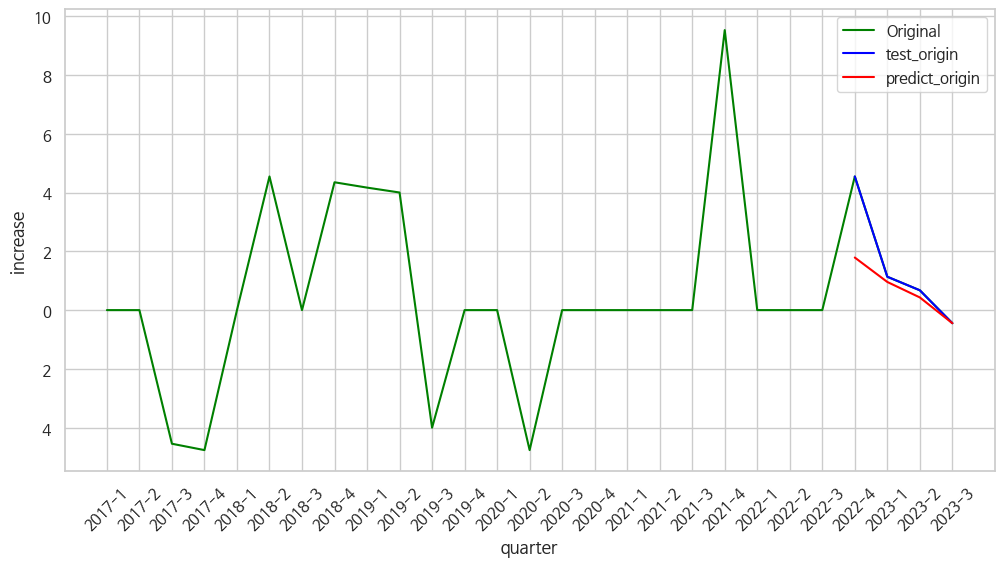

In [220]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_glasses['분기'], ap_glasses['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [221]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.794728
std      1.312810
min      0.000000
25%      0.133334
50%      0.210506
75%      0.871900
max      2.757900
dtype: float64

In [222]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 19ms/step
[[0.30943578]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.3413935601711273 


### 추가

In [223]:
ap_glasses.loc[27] = ['2023-4', '안경', sales, growth, increase, marketability]

<ipython-input-223-eef2a7cf553f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_glasses.loc[27] = ['2023-4', '안경', sales, growth, increase, marketability]


In [224]:
final_ap_glasses = ap_glasses
final_ap_glasses

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,안경,2.639010e+09,1.000000,0.000000,-1.413315e+07
1,2017-2,안경,2.973513e+09,1.126753,0.000000,-2.008426e+07
2,2017-3,안경,2.407186e+09,0.809543,-4.545455,-1.010021e+07
3,2017-4,안경,2.501277e+09,1.039087,-4.761905,9.875845e+06
4,2018-1,안경,2.307336e+09,0.922463,0.000000,-4.344723e+06
5,2018-2,안경,2.497902e+09,1.082591,4.545455,-7.657134e+06
6,2018-3,안경,2.221422e+09,0.889315,0.000000,-9.250249e+06
7,2018-4,안경,1.846489e+09,0.831219,4.347826,-7.778654e+06
8,2019-1,안경,2.891061e+09,1.565707,4.166667,2.305281e+07
9,2019-2,안경,2.576371e+09,0.891150,4.000000,9.024241e+06


## 최종결과

In [225]:
### X / y 데이터 생성
X = ap_glasses[['성장성', '시장성', '순점포증감률']]
y = ap_glasses.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.413315e+07  0.000000
1   1.126753 -2.008426e+07  0.000000
2   0.809543 -1.010021e+07 -4.545455
3   1.039087  9.875845e+06 -4.761905
4   0.922463 -4.344723e+06  0.000000
5   1.082591 -7.657134e+06  4.545455
6   0.889315 -9.250249e+06  0.000000
7   0.831219 -7.778654e+06  4.347826
8   1.565707  2.305281e+07  4.166667
9   0.891150  9.024241e+06  4.000000
10  1.105738  2.422192e+07 -4.000000
11  0.873119  1.361433e+07  0.000000
12  0.984095  2.220935e+07  0.000000
13  1.064829  2.579037e+07 -4.761905
14  1.001510  4.239485e+07  0.000000
15  0.996088  4.798426e+07  0.000000
16  0.928437  3.208893e+07  0.000000
17  1.126303  3.897579e+07  0.000000
18  0.966173  3.773355e+07  0.000000
19  1.011257  3.918644e+07  9.523810
20  0.962823  3.280120e+07  0.000000
21  1.241209  5.457317e+07  0.000000
22  0.882710  4.209091e+07  0.000000
23  1.001989  3.763321e+07  4.545455
24  1.029064  5.486280e+06  1.134833
25  1.033702  1.085680e+07  0.673975
2

In [226]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [227]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.2546228  0.37428979 0.30211669]
 [0.25126439 0.36745001 0.30943578]]


In [228]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [229]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [230]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2841
Epoch 1: val_loss improved from inf to 0.49201, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.2841 - val_loss: 0.4920
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2832
Epoch 2: val_loss improved from 0.49201 to 0.49033, saving model to stock_model.h5
1/1 [==============================] - 0s 68ms/step - loss: 0.2832 - val_loss: 0.4903
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2822
Epoch 3: val_loss improved from 0.49033 to 0.48865, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.2822 - val_loss: 0.4887
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2812
Epoch 4: val_loss improved from 0.48865 to 0.48698, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.2812 - val_loss: 0.4870
Epoch 5/300
1/1 [=================

In [231]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.53886145]
 [0.581915  ]
 [0.4755607 ]
 [0.46513763]]


In [232]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_glasses.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.486443,0.538861
2023-2,0.549457,0.581915
2023-3,0.468232,0.475561
2023-4,0.456383,0.465138


In [233]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_glasses.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_glasses의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.486443,0.538861,2.492648e+09,2.562277e+09,-69629184.0
2023-2,0.549457,0.581915,2.576351e+09,2.619466e+09,-43114752.0
2023-3,0.468232,0.475561,2.468457e+09,2.478192e+09,-9735168.0
2023-4,0.456383,0.465138,2.452718e+09,2.464347e+09,-11629568.0


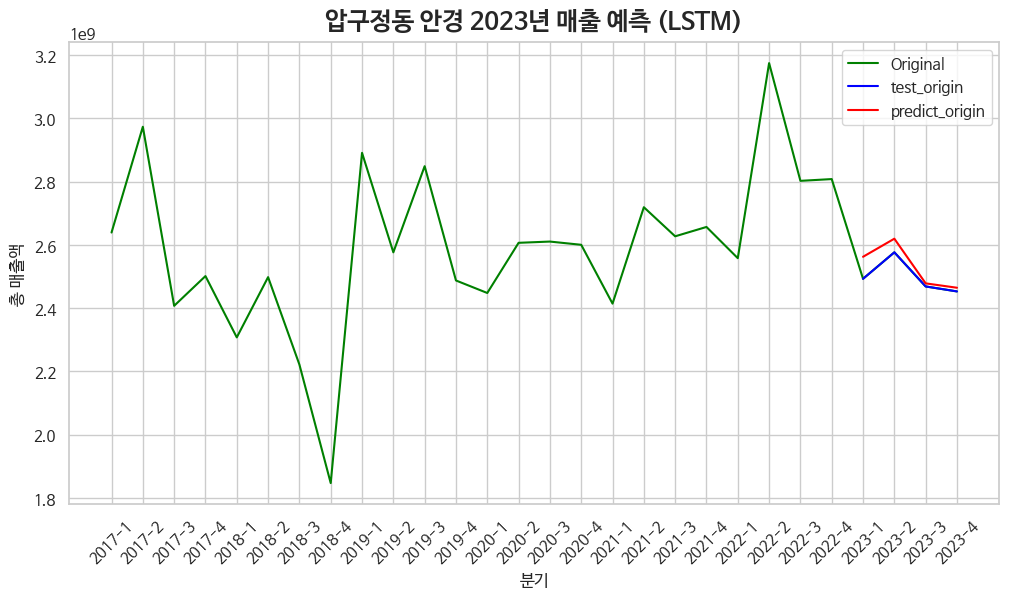

In [234]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 안경 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_glasses['분기'], ap_glasses['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()